In [11]:
#IMPORTS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
import math
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.stattools import durbin_watson
import itertools
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report


# Data Preprocessing

In [12]:

# Download the dataset
path = kagglehub.dataset_download("alexteboul/heart-disease-health-indicators-dataset")
print("Path to dataset files:", path)
df = pd.read_csv(f"{path}/heart_disease_health_indicators_BRFSS2015.csv")
df.columns

# Bin BMI to be binary based on domain knowledge
df['BMI_Binned'] = np.where(df['BMI'] <= 25, 0, 1)

# One-hot Diabetes column so it is Categorical. Drop one level to avoid multicollinearity
one_hot = pd.get_dummies(df['Diabetes'], prefix='Diabetes', drop_first=True).astype(int)
df = pd.concat([df, one_hot], axis=1)

# List of categorical columns (including one-hot encoded Diabetes columns)
categorical_columns = [
    'HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
    'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
    'Education', 'Income', 'BMI_Binned'
] + one_hot.columns.tolist()

print(df.columns)


Path to dataset files: C:\Users\ssjed\.cache\kagglehub\datasets\alexteboul\heart-disease-health-indicators-dataset\versions\3
Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'BMI_Binned', 'Diabetes_1.0', 'Diabetes_2.0'],
      dtype='object')


C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDiseaseorAttack', data=df, palette='viridis')


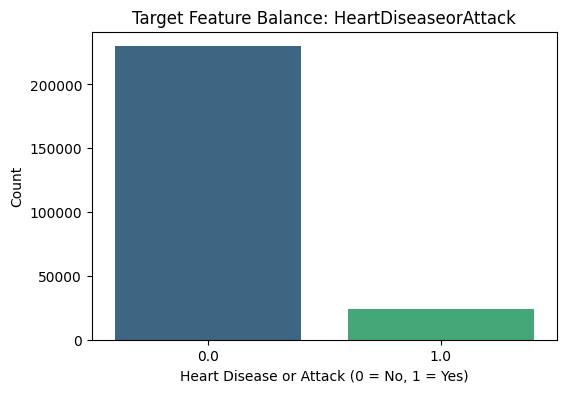

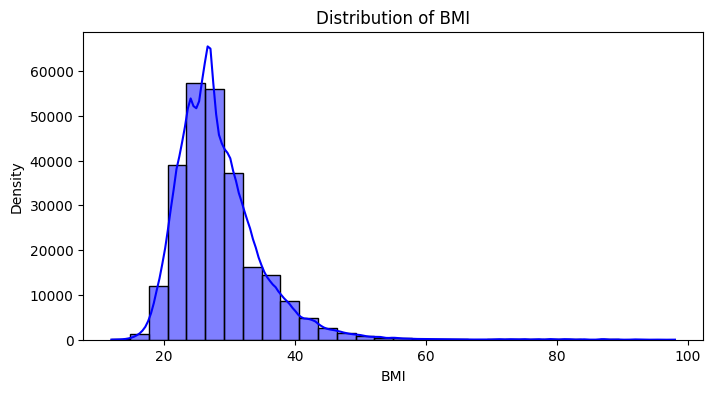

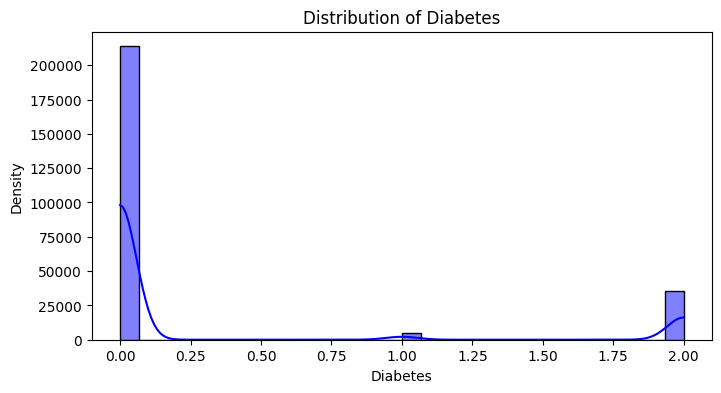

C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')


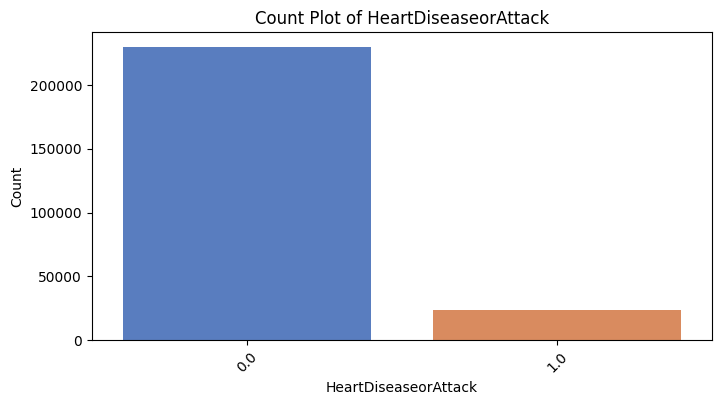

C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')


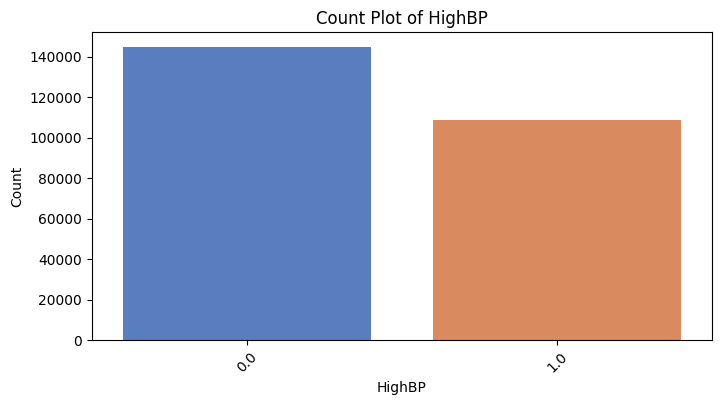

C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')


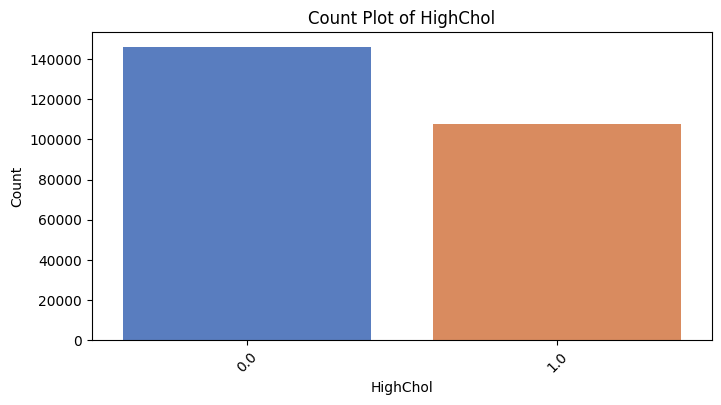

C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')


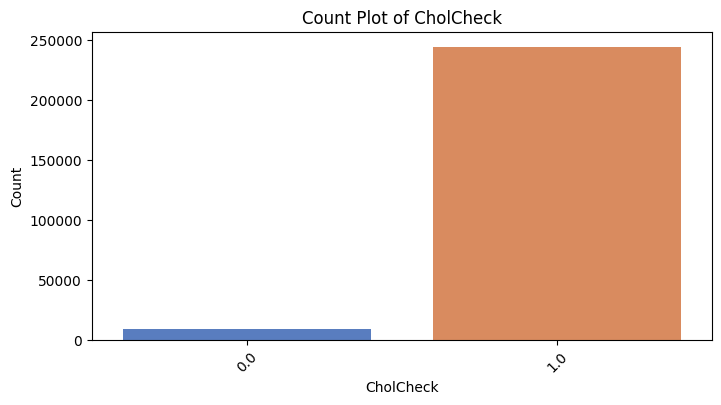

C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')


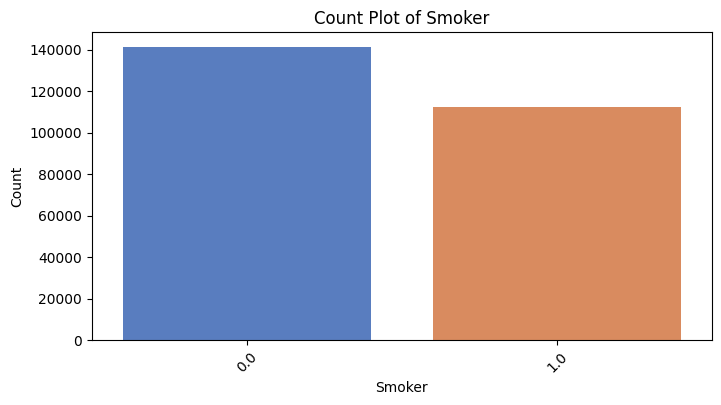

C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')


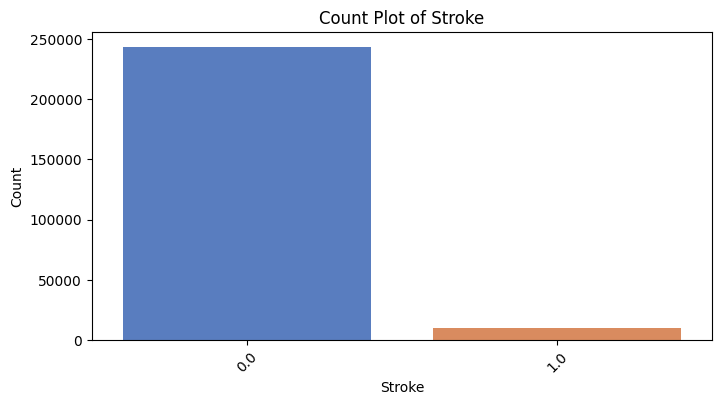

C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')


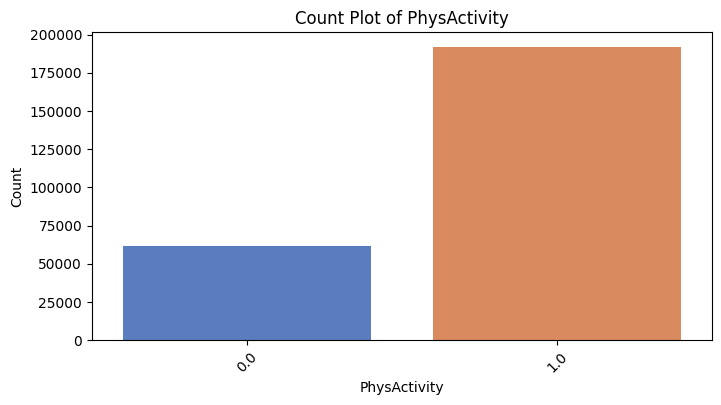

C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')


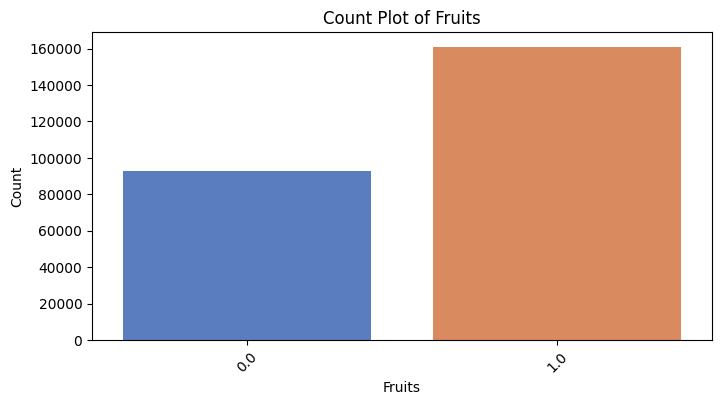

C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')


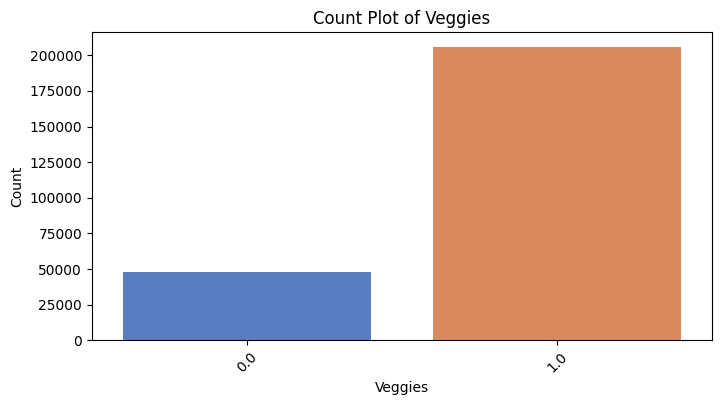

C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')


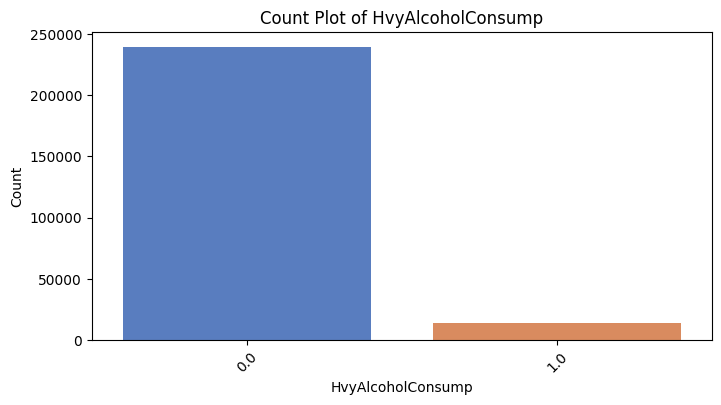

C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')


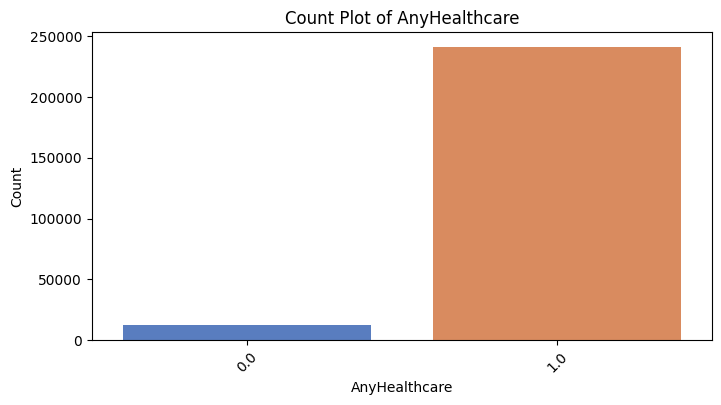

C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')


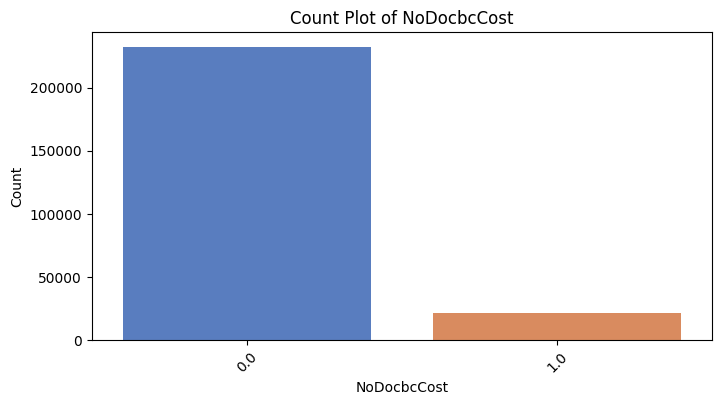

C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')


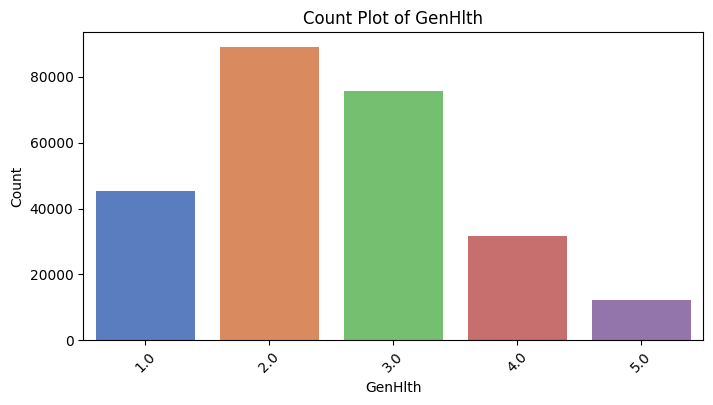

C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')


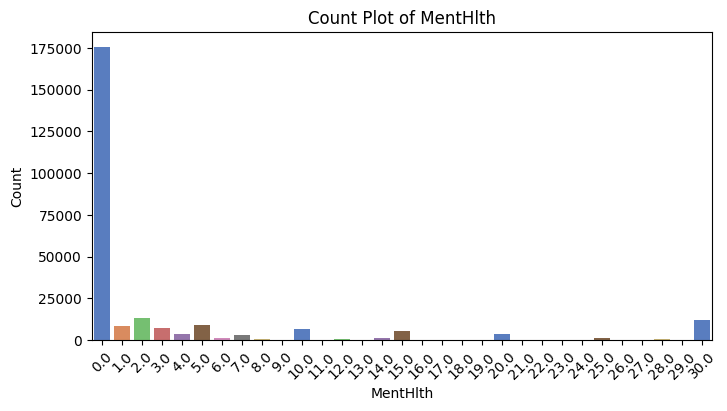

C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')


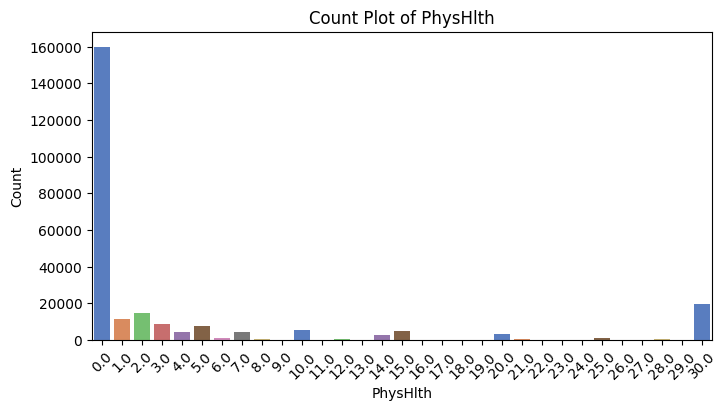

C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')


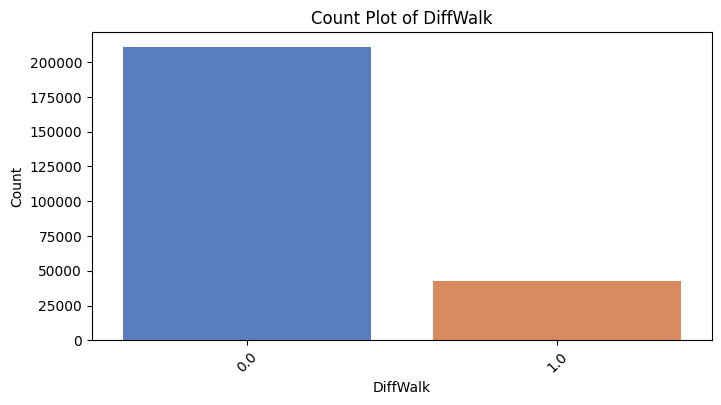

C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')


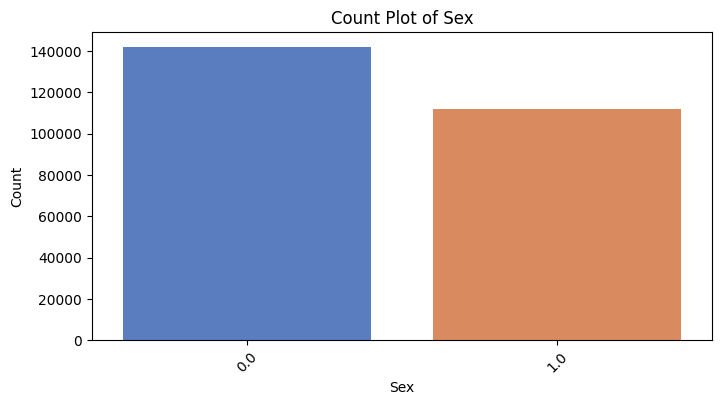

C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')


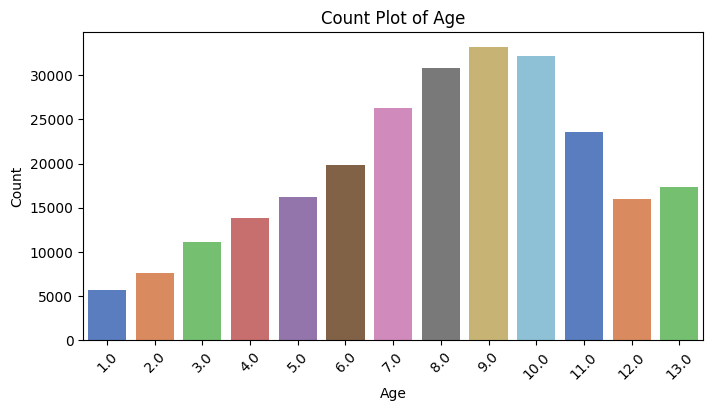

C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')


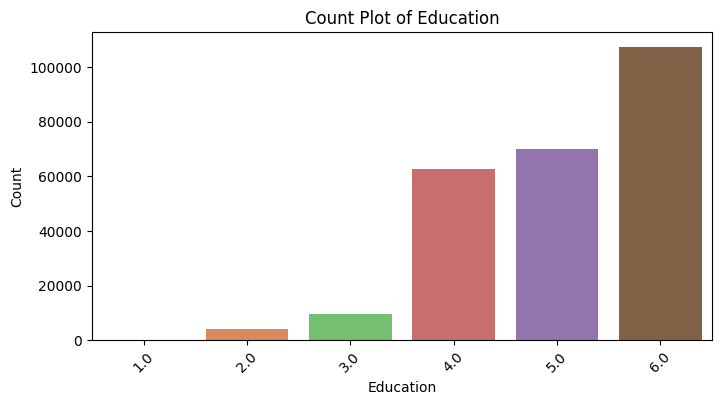

C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')


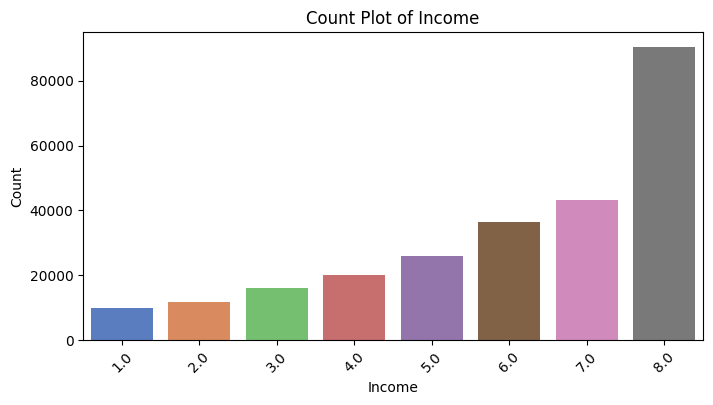

C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')


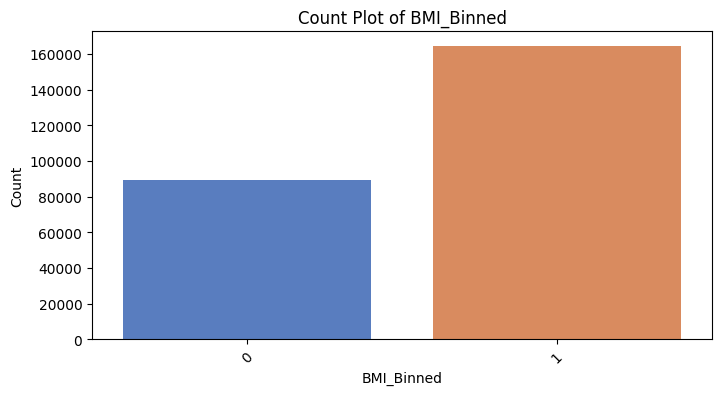

C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')


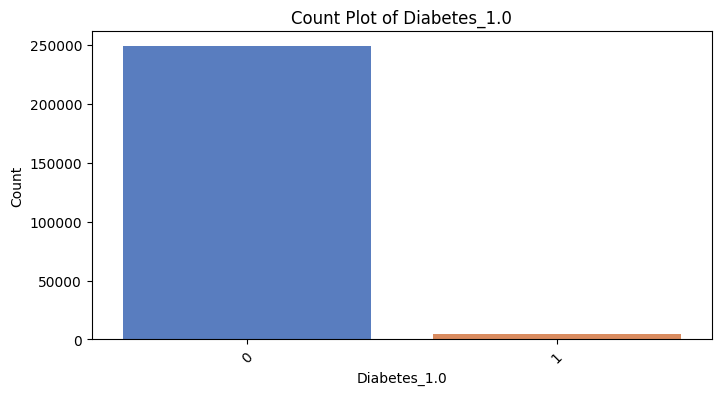

C:\Users\ssjed\AppData\Local\Temp\ipykernel_33596\1427307975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')


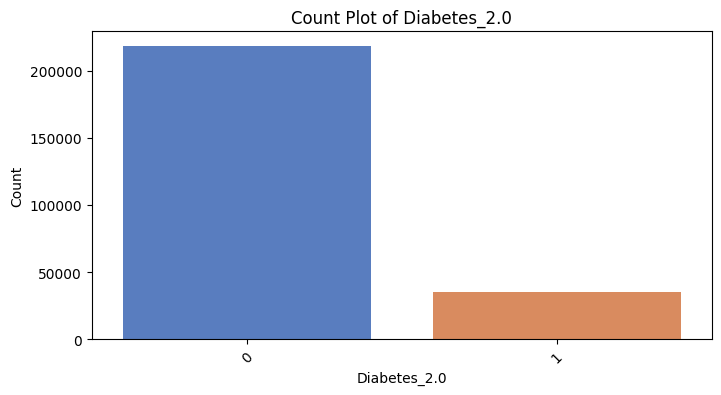

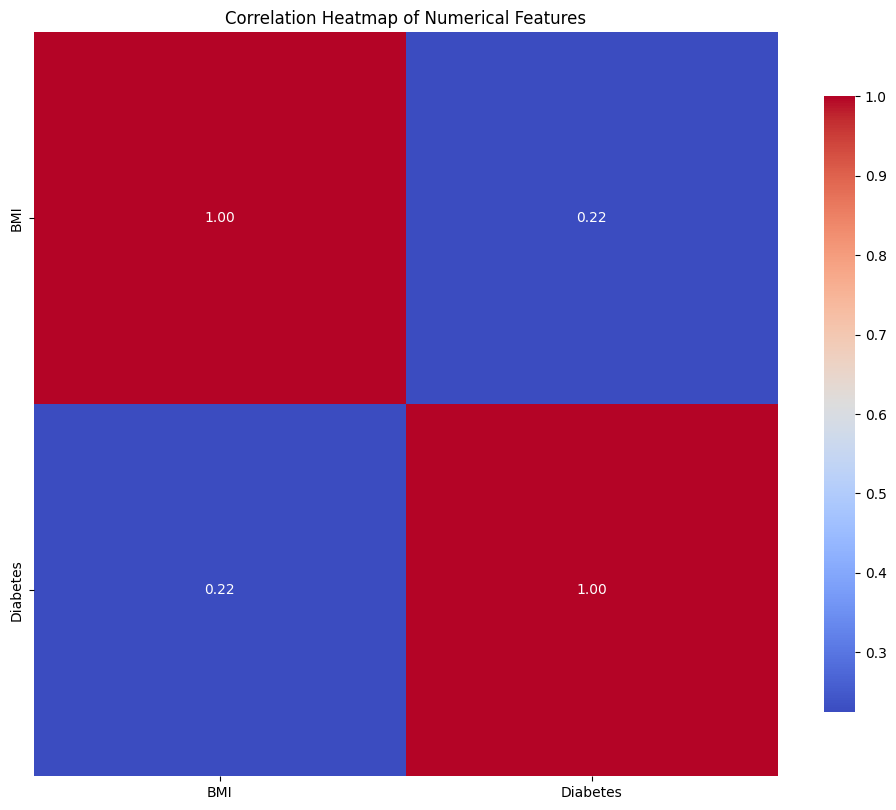

In [13]:
# Plot target feature balance
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDiseaseorAttack', data=df, palette='viridis')
plt.title('Target Feature Balance: HeartDiseaseorAttack')
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Plot distribution of numerical features
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col not in categorical_columns]

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

# Plot count plots for categorical features
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, palette='muted')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


# Testing Independence of Observations

In [14]:
# Inferred from dataset -> Data is independent as it is different samples

# Testing of Collinearity among predictors

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select numeric predictors to test for collinearity
factors = df.select_dtypes(include=[np.number])
print(factors.columns)
# Add constant for VIF calculation
factors = add_constant(factors)

# Calculate VIF
vif = pd.DataFrame()
vif['Variable'] = factors.columns
vif['VIF'] = [variance_inflation_factor(factors.values, i) for i in range(factors.shape[1])]
print(vif)

# Nothing looks to be too colinear based on VIF and dropping one diabetes level for reference in one hot

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'BMI_Binned', 'Diabetes_1.0', 'Diabetes_2.0'],
      dtype='object')


c:\Users\ssjed\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                Variable         VIF
0                  const  120.624385
1   HeartDiseaseorAttack    1.175839
2                 HighBP    1.348889
3               HighChol    1.185152
4              CholCheck    1.033717
5                    BMI    1.831137
6                 Smoker    1.091892
7                 Stroke    1.081641
8               Diabetes         inf
9           PhysActivity    1.157418
10                Fruits    1.112801
11               Veggies    1.112410
12     HvyAlcoholConsump    1.025650
13         AnyHealthcare    1.113209
14           NoDocbcCost    1.144418
15               GenHlth    1.824980
16              MentHlth    1.239717
17              PhysHlth    1.624230
18              DiffWalk    1.537292
19                   Sex    1.086590
20                   Age    1.356812
21             Education    1.328245
22                Income    1.507611
23            BMI_Binned    1.740872
24          Diabetes_1.0         inf
25          Diabetes_2.0         inf


# Testing Outliers

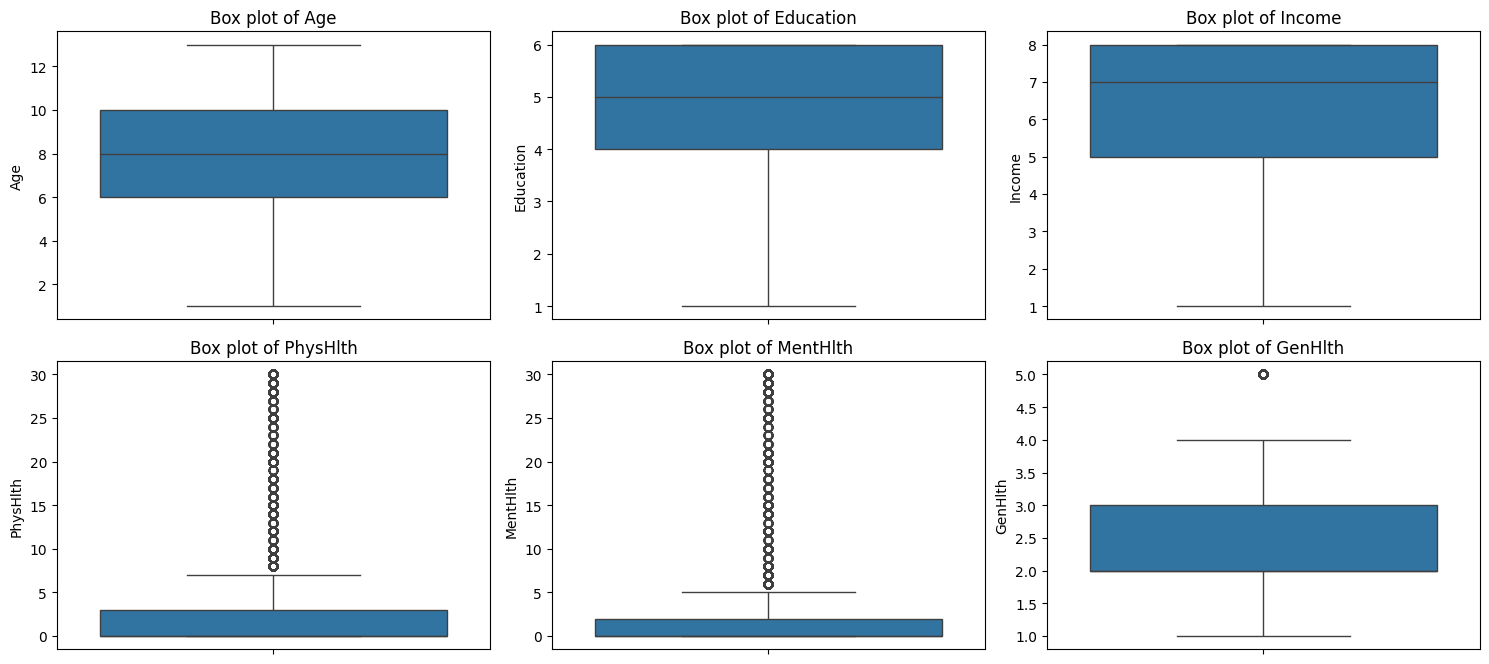

Number of outliers per numerical feature:
Age              0
Education     4217
Income           0
PhysHlth         0
MentHlth     12697
GenHlth          0
dtype: int64


Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex',
       'Age', 'Education', 'Income', 'BMI_Binned', 'Diabetes_1.0',
       'Diabetes_2.0'],
      dtype='object')

In [16]:
numerical_columns = ['Age', 'Education', 'Income', 'PhysHlth', 'MentHlth', 'GenHlth']

# Box plots for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

# Alternatively, using Z-scores to detect outliers
from scipy import stats

z_scores = np.abs(stats.zscore(df[numerical_columns]))
threshold = 3
outliers = (z_scores > threshold).sum()
print("Number of outliers per numerical feature:")
print(outliers)

# Remove outliers -> mentHlth, PhysHlth, GenHlth
df.drop('PhysHlth', axis=1, inplace=True)
df.drop('MentHlth', axis=1, inplace=True)
df.drop('GenHlth', axis=1, inplace=True)
df.columns

# Visually, and by setting arbitrary z score threshold we see mentHlth, PhysHlth, GenHlth have outliers

# Linearity of Log Odds and Predictors

In [17]:
# Took out BMI which was main continuous column (All other are categorial), so theres no linearity of log odds and predictors

# Full Logistic Regression Model

In [18]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Encode categorical variables and prepare data
X = pd.get_dummies(df.drop(columns=['HeartDiseaseorAttack', 'BMI', 'Diabetes']), drop_first=True)
y = df['HeartDiseaseorAttack']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add a constant term for intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit logistic regression model
full_model = sm.Logit(y_train, X_train).fit()  # Pass DataFrame directly
print(full_model.summary())

# If you use one-hot encoding (pd.get_dummies) for the Diabetes column and include all the resulting dummy variables 
# (e.g., Diabetes_0 and Diabetes_1), one of them will be perfectly correlated with the intercept (constant term).

Optimization terminated successfully.
         Current function value: 0.245681
         Iterations 8
                            Logit Regression Results                            
Dep. Variable:     HeartDiseaseorAttack   No. Observations:               177576
Model:                            Logit   Df Residuals:                   177556
Method:                             MLE   Df Model:                           19
Date:                  Wed, 20 Nov 2024   Pseudo R-squ.:                  0.2151
Time:                          14:51:43   Log-Likelihood:                -43627.
converged:                         True   LL-Null:                       -55585.
Covariance Type:              nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.1298      0.105    -58.292      0.000      -6.336     

In [19]:
# Predictions on the test set
y_pred_prob = full_model.predict(X_test)  # Get predicted probabilities
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions (threshold = 0.5)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate precision-recall table
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average=None)

precision_recall_table = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Support'],
    'Class 0': [precision[0], recall[0], f1[0], support[0]],
    'Class 1': [precision[1], recall[1], f1[1], support[1]]
})

print("\nPrecision-Recall Table:")
print(precision_recall_table)

# Full classification report for additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9077

Precision-Recall Table:
      Metric       Class 0      Class 1
0  Precision      0.914793     0.525144
1     Recall      0.990421     0.103001
2   F1-Score      0.951106     0.172223
3    Support  69007.000000  7097.000000

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     69007
         1.0       0.53      0.10      0.17      7097

    accuracy                           0.91     76104
   macro avg       0.72      0.55      0.56     76104
weighted avg       0.88      0.91      0.88     76104



# Testing Independence of Errors

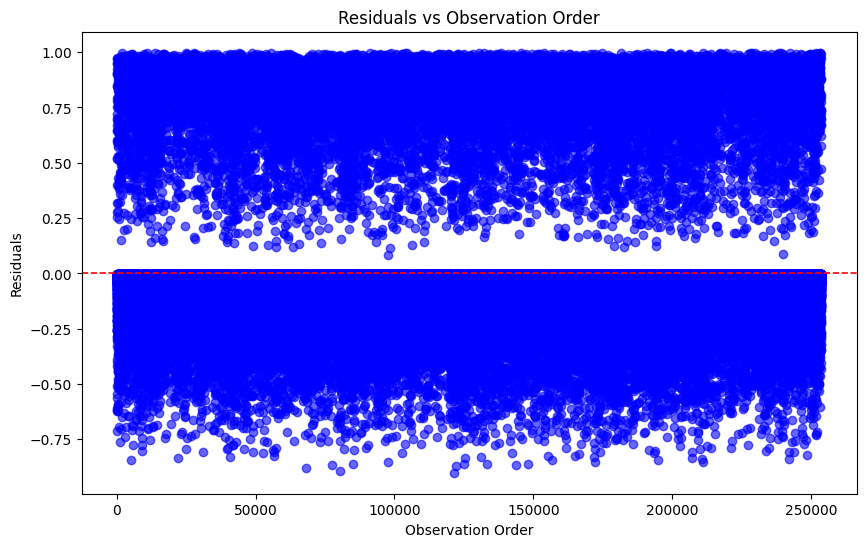

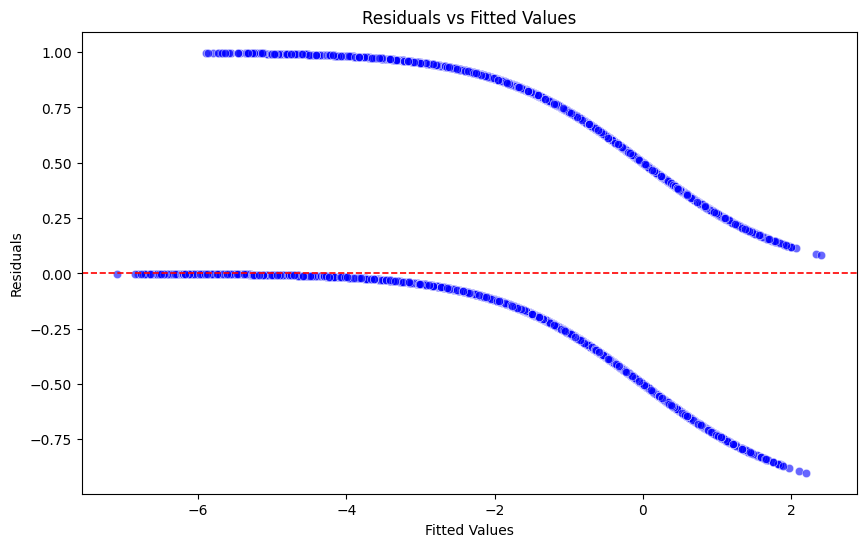

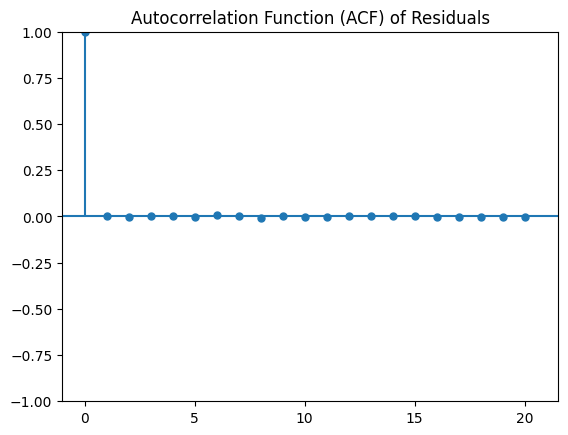

Durbin-Watson statistic: 1.9954206531579137


In [20]:
# Residuals and fitted values from the training set
residuals = full_model.resid_response  # Response residuals
fitted_values = full_model.fittedvalues  # Predicted probabilities on training data

# Function to plot residuals vs observation order
def plot_residuals_vs_order(residuals):
    plt.figure(figsize=(10, 6))
    plt.plot(residuals, marker='o', linestyle='none', color='blue', alpha=0.6)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1.2)
    plt.title("Residuals vs Observation Order")
    plt.xlabel("Observation Order")
    plt.ylabel("Residuals")
    plt.show()

# Function to plot residuals vs fitted values
def plot_residuals_vs_fitted(fitted_values, residuals):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=fitted_values, y=residuals, alpha=0.6, color="blue")
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1.2)
    plt.title("Residuals vs Fitted Values")
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    plt.show()

# Function to plot autocorrelation function (ACF) of residuals
def plot_residuals_acf(residuals):
    plot_acf(residuals, lags=20, alpha=0.05)
    plt.title("Autocorrelation Function (ACF) of Residuals")
    plt.show()

# Plot residual diagnostics
plot_residuals_vs_order(residuals)
plot_residuals_vs_fitted(fitted_values, residuals)
plot_residuals_acf(residuals)

# Perform Durbin-Watson test for autocorrelation
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat}")

# Looks to be randomly scattered, no clear pattern, no autocorrelation and independent errors

# Analyze Interactions

In [21]:
# Only add interaction terms for categorical variables not binary ones because interaction effects of binary
# variables are already captured in the main effects

import itertools
from sklearn.preprocessing import StandardScaler

# Scale numeric features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Generate interaction terms only for Income, Education, and Age
interaction_terms = {}
key_features = ['Income', 'Education', 'Age']
for col1, col2 in itertools.combinations(X_scaled.columns, 2):
    if col1 in key_features or col2 in key_features:
        interaction_name = f"{col1}_{col2}"
        interaction_terms[interaction_name] = X_scaled[col1] * X_scaled[col2]

# Add interaction terms
interaction_df = pd.DataFrame(interaction_terms)
X_scaled = pd.concat([X_scaled, interaction_df], axis=1)

# Remove near-zero variance columns
X_scaled = X_scaled.loc[:, X_scaled.var() > 1e-5]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Add a constant term for intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit logistic regression model
interaction_model = sm.Logit(y_train, X_train).fit()

# Print the model summary
print(interaction_model.summary())


Optimization terminated successfully.
         Current function value: 0.243672
         Iterations 9
                            Logit Regression Results                            
Dep. Variable:     HeartDiseaseorAttack   No. Observations:               177576
Model:                            Logit   Df Residuals:                   177505
Method:                             MLE   Df Model:                           70
Date:                  Wed, 20 Nov 2024   Pseudo R-squ.:                  0.2215
Time:                          14:52:19   Log-Likelihood:                -43270.
converged:                         True   LL-Null:                       -55585.
Covariance Type:              nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.0558      0.016   -186.0

In [22]:
# --- Evaluation ---
# Predictions on the test set
y_pred_prob = interaction_model.predict(X_test)  # Get predicted probabilities
y_pred = (y_pred_prob >= 0.5).astype(int)        # Convert probabilities to binary predictions (threshold = 0.5)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Generate precision-recall table
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average=None)

precision_recall_table = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Support'],
    'Class 0': [precision[0], recall[0], f1[0], support[0]],
    'Class 1': [precision[1], recall[1], f1[1], support[1]]
})

print("\nPrecision-Recall Table:")
print(precision_recall_table)

# Full classification report for additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Result is slightly better but might just be to random split of data


Accuracy: 0.9082

Precision-Recall Table:
      Metric       Class 0      Class 1
0  Precision      0.913580     0.550401
1     Recall      0.992696     0.086938
2   F1-Score      0.951497     0.150158
3    Support  69007.000000  7097.000000

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     69007
         1.0       0.55      0.09      0.15      7097

    accuracy                           0.91     76104
   macro avg       0.73      0.54      0.55     76104
weighted avg       0.88      0.91      0.88     76104



In [23]:
def evaluate_model_performance(model, X_test, y_test, name="Model"):
    """
    Evaluate model performance with accuracy, precision, recall, and F1-score.
    """
    # Make predictions
    y_pred_prob = model.predict(X_test)  # Predicted probabilities
    y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} - Accuracy: {accuracy:.4f}")

    # Generate precision-recall table
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average=None)

    precision_recall_table = pd.DataFrame({
        'Metric': ['Precision', 'Recall', 'F1-Score', 'Support'],
        'Class 0': [precision[0], recall[0], f1[0], support[0]],
        'Class 1': [precision[1], recall[1], f1[1], support[1]]
    })

    print(f"\n{name} - Precision-Recall Table:")
    print(precision_recall_table)

    # Full classification report
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_pred))

# Backward Selection

In [24]:
def backward_elimination_aic_bic(X, y, criterion='aic'):
    """
    Perform backward elimination using AIC or BIC.
    """
    X_train = sm.add_constant(X)  # Add constant for intercept
    while True:
        model = sm.Logit(y, X_train).fit(disp=0)  # Fit logistic regression
        if criterion == 'aic':
            scores = model.aic
        elif criterion == 'bic':
            scores = model.bic
        else:
            raise ValueError("Criterion must be 'aic' or 'bic'")
        
        # Check p-values for features
        max_p_value = model.pvalues.max()  # Maximum p-value
        if max_p_value > 0.05:  # Use 0.05 as significance threshold
            worst_feature = model.pvalues.idxmax()
            X_train = X_train.drop(columns=worst_feature)
        else:
            break  # Stop when all p-values are significant
    return model, X_train


In [25]:
# Evaluate Backward Elimination Model
final_model_aic, selected_features_aic = backward_elimination_aic_bic(X_train, y_train, criterion='aic')
X_test_selected_aic = X_test[selected_features_aic.columns]  # Select the same features for the test set
evaluate_model_performance(final_model_aic, sm.add_constant(X_test_selected_aic), y_test, name="Backward Elimination (AIC)")
print("\nFinal model summary after forward selection (AIC):")
print(final_model_aic.summary())

# Evaluate Backward Elimination Model
final_model_bic, selected_features_bic = backward_elimination_aic_bic(X_train, y_train, criterion='bic')
X_test_selected_bic = X_test[selected_features_bic.columns]  # Select the same features for the test set
evaluate_model_performance(final_model_bic, sm.add_constant(X_test_selected_bic), y_test, name="Backward Elimination (BIC)")
print("\nFinal model summary after forward selection (BIC):")
print(final_model_bic.summary())



Backward Elimination (AIC) - Accuracy: 0.9085

Backward Elimination (AIC) - Precision-Recall Table:
      Metric       Class 0      Class 1
0  Precision      0.913745     0.558016
1     Recall      0.992769     0.088770
2   F1-Score      0.951619     0.153173
3    Support  69007.000000  7097.000000

Backward Elimination (AIC) - Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     69007
         1.0       0.56      0.09      0.15      7097

    accuracy                           0.91     76104
   macro avg       0.74      0.54      0.55     76104
weighted avg       0.88      0.91      0.88     76104


Final model summary after forward selection (AIC):
                            Logit Regression Results                            
Dep. Variable:     HeartDiseaseorAttack   No. Observations:               177576
Model:                            Logit   Df Residuals:                   177545
Method:                 

# Forward Selection

In [26]:
import statsmodels.api as sm

def forward_selection_aic_bic(X, y, criterion='aic'):
    """
    Perform forward selection using AIC or BIC as the criterion.
    
    Parameters:
    - X: pd.DataFrame, predictors
    - y: pd.Series or np.array, response variable
    - criterion: str, 'aic' or 'bic' to determine the selection criterion
    
    Returns:
    - final_model: Fitted statsmodels Logit model with the selected features
    - selected_features: List of features selected by the process
    """
    if criterion not in ['aic', 'bic']:
        raise ValueError("Criterion must be 'aic' or 'bic'")
    
    remaining_features = list(X.columns)
    selected_features = []
    current_score = float('inf')  # Initial score set to infinity
    best_features = None

    while remaining_features:
        scores_with_candidates = []
        
        for candidate in remaining_features:
            # Combine selected features with the candidate
            features_to_test = selected_features + [candidate]
            X_train = sm.add_constant(X[features_to_test])  # Add intercept
            
            # Fit logistic regression model
            model = sm.Logit(y, X_train).fit(disp=0)
            
            # Compute the selection criterion
            score = model.aic if criterion == 'aic' else model.bic
            scores_with_candidates.append((score, candidate))

        # Sort candidates by score (lower is better)
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]
        
        # If the score improves, add the candidate to selected features
        if best_new_score < current_score:
            current_score = best_new_score
            selected_features.append(best_candidate)
            remaining_features.remove(best_candidate)
            print(f"Added feature: {best_candidate}, {criterion} = {current_score:.2f}")
        else:
            break  # Stop if no improvement
    
    # Fit final model with selected features
    X_train = sm.add_constant(X[selected_features])
    final_model = sm.Logit(y, X_train).fit()
    
    return final_model, selected_features


# Perform forward selection with AIC
final_model_aic, selected_features_aic = forward_selection_aic_bic(X_train, y_train, criterion='aic')
evaluate_model_performance(final_model_aic, sm.add_constant(X_test_selected_aic), y_test, name="Forward Elimination (AIC)")
print("\nFinal model summary after forward selection (AIC):")
print(final_model_aic.summary())
print(f"\nSelected features after forward selection (AIC): {selected_features_aic}")

# # Perform forward selection with BIC
# final_model_bic, selected_features_bic = forward_selection_aic_bic(X_train, y_train, criterion='bic')
# evaluate_model_performance(final_model_bic, sm.add_constant(X_test_selected_bic), y_test, name="Forward Elimination (BIC)")

# print("\nFinal model summary after forward selection (BIC):")
# print(final_model_bic.summary())
# print(f"\nSelected features after forward selection (BIC): {selected_features_bic}")

Added feature: Age, aic = 101316.43
Added feature: DiffWalk, aic = 97451.50
Added feature: HighBP, aic = 94687.79
Added feature: Sex, aic = 92702.06
Added feature: Stroke, aic = 90875.90
Added feature: HighChol, aic = 89340.98
Added feature: Income, aic = 88623.37
Added feature: Smoker, aic = 88096.59
Added feature: Diabetes_2.0, aic = 87565.98
Added feature: DiffWalk_Age, aic = 87360.02
Added feature: NoDocbcCost, aic = 87245.56
Added feature: Stroke_Age, aic = 87141.43
Added feature: HighBP_Age, aic = 87055.77
Added feature: Age_Income, aic = 86992.78
Added feature: Sex_Income, aic = 86929.29
Added feature: HvyAlcoholConsump, aic = 86870.56
Added feature: CholCheck, aic = 86816.95
Added feature: HighChol_Income, aic = 86788.96
Added feature: Smoker_Age, aic = 86764.17
Added feature: Sex_Age, aic = 86739.38
Added feature: PhysActivity, aic = 86719.96
Added feature: Education_Income, aic = 86706.75
Added feature: Education, aic = 86676.56
Added feature: Age_Diabetes_2.0, aic = 86665.61

ValueError: shapes (76104,31) and (37,) not aligned: 31 (dim 1) != 37 (dim 0)